> # ***Lets start our Journey towards this task*** 


---
## 1. ***Problem Statement***
---

-  Given a dataset of tomato leaf images, the task is to develop a machine learning model that can accurately classify the images into different disease categories. The goal is to help farmers quickly identify and treat diseased tomato plants, thereby improving crop yield and reducing losses.
---
## 2. ***Our Working***
---

-  We are using a dataset containing images of tomato leaves affected by various diseases. Our approach involves training a deep learning model on this dataset to classify each image into one of the disease categories. By analyzing the patterns and features in the images, the model can learn to differentiate between healthy and diseased leaves, aiding in the early detection and management of plant diseases.

> # ***About The Data***

---
## 1. ***Dataset Description:***
---

-  We are using a dataset containing images of tomato leaves affected by various diseases. Each image is labeled with the corresponding disease category.Training dataset contain 10000 labeled images and test/val data contain 1000 labeled images
---
## 2. ***Data Preprocessing***
----

-  We load the dataset and preprocess the images to prepare them for training. This includes resizing the images to a consistent size and normalizing the pixel values.We also split the dataset into training and validation sets to evaluate the model's performance.
---
## 3. ***Model Building***
---

- We use a deep learning model, such as a Convolutional Neural Network (CNN), to learn features from the images and classify them into disease categories.The model consists of layers that extract patterns and features from the images, followed by fully connected layers for classification.
----
## 4. ***Training the Model:***
----

- We train the model using the training dataset, adjusting the model's weights based on the difference between predicted and actual disease categories.During training, we monitor the model's performance on the validation set to avoid overfitting.
---
## 5. ***Model Evaluation:***
----

- After training, we evaluate the model's performance on the validation set to assess its ability to generalize to new, unseen data.We use metrics such as accuracy to measure the model's performance.
----
## 6. ***Inference:***
---

- **Once the model is trained and evaluated, we can use it to classify new tomato leaf images into disease categories.**

***```This inference step is crucial for real-world applications, where the model is used to assist farmers in diagnosing plant diseases.
By understanding the working of this code, beginners and others can gain insights into how machine learning models are developed and deployed for practical applications like plant disease classification.```***

<div style="border-radius: 30px 0 30px 0px; border: 2px solid #00ea98; padding: 20px; background-color: #0a141b; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #7ab052; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px;">  1 | Importing The Libraries</h1>
</div>

In [1]:
import os  # Operating system interfaces
import tensorflow as tf                                    # TensorFlow deep learning framework
import matplotlib.pyplot as plt                            # Plotting library
import matplotlib.image as mpimg                           # Image loading and manipulation library
from tensorflow.keras.models import Sequential, Model      # Sequential and Functional API for building models
from tensorflow.keras.optimizers import Adam               # Adam optimizer for model training
from tensorflow.keras.callbacks import EarlyStopping       # Early stopping callback for model training
from tensorflow.keras.regularizers import l1, l2           # L1 and L2 regularization for model regularization
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Data augmentation and preprocessing for images
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D, AveragePooling2D, MaxPooling2D, BatchNormalization  
# Various types of layers for building neural networks
from tensorflow.keras.applications import DenseNet121, EfficientNetB4, Xception, VGG16, VGG19   # Pre-trained models for transfer learning

<div style="border-radius: 30px 0 30px 0px; border: 2px solid #00ea98; padding: 20px; background-color: #0a141b; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #7ab052; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px;"> 2 | Loading The DataSet</h1>
</div>

**WORKING**
- The `image_dataset_from_directory` function is used to load image data from a directory.
- Images are resized to 256x256 pixels and grouped into batches of 32 for training efficiency.
- Labels are inferred from the directory structure and represented in a categorical format.
- Pixel values of the images are normalized to a range of [0, 1] by dividing by 255.0.

In [2]:
train_data = tf.keras.utils.image_dataset_from_directory(
    "C:/Projekty/pr_magi_2024/archive/tomato/train",
    labels='inferred',
    label_mode='categorical',
    image_size=(256, 256),
    batch_size=32)

train_data = train_data.map(lambda x, y: (x / 255.0, y))

Found 10000 files belonging to 10 classes.


tf.keras.utils.image_dataset_from_directory: Funkcja tworzy zestaw danych obrazów na podstawie struktury katalogów. Każdy podkatalog reprezentuje jedną klasę.

'C:/Users/szym3n/Desktop/archive/tomato/train': Ścieżka do katalogu treningowego, gdzie obrazy są zorganizowane w podkatalogach. Nazwy podkatalogów są traktowane jako etykiety klas (np. jeśli istnieją foldery healthy i diseased, to będą to klasy).

labels='inferred': Etykiety są automatycznie wnioskowane na podstawie nazw podkatalogów.

label_mode='categorical': Etykiety są kodowane w formacie "one-hot encoding". Przykład: Jeśli są 3 klasy, to etykieta dla klasy 2 może wyglądać tak: [0, 0, 1].

image_size=(256, 256): Wszystkie obrazy są skalowane do wymiarów 
256
×
256
256×256 pikseli (szerokość i wysokość). Jest to wymagane, aby modele mogły działać na obrazach o jednolitym rozmiarze.

batch_size=32: Zestaw danych jest dzielony na partie (ang. batch), z których każda zawiera 32 obrazy. Pozwala to na bardziej efektywne przetwarzanie danych przez model.

train_data.map: Metoda umożliwia transformację danych w zestawie, np. normalizację lub augmentację obrazów.

lambda x, y: (x / 255.0, y):

x: Macierz reprezentująca piksele obrazów (o kształcie np. (32, 256, 256, 3) dla 32 obrazów w partii, o rozmiarze 
256
×
256
256×256, z trzema kanałami kolorów: RGB).
x / 255.0: Normalizuje wartości pikseli, które domyślnie są w zakresie 0-255 (8-bitowa skala), do zakresu 0-1. Normalizacja przyspiesza trenowanie modelu i poprawia stabilność numeryczną.
y: Etykiety obrazów (pozostają bez zmian, np. [0, 1, 0]).
Efekt: Dane treningowe są przygotowane w formacie:

x: Obrazy znormalizowane w zakresie [0, 1].
y: Kategoriowe etykiety w formacie "one-hot".



**WORKING**
- The image_dataset_from_directory function is used to load validation image data from a directory.
- Images are resized to 256x256 pixels and grouped into batches of 32 for efficient processing.
- Labels are inferred from the directory structure and represented in a categorical format.
- Pixel values of the images are normalized to a range of [0, 1] by dividing by 255.0 for consistent model training.

In [3]:
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    "C:/Projekty/pr_magi_2024/archive/tomato/val",
    labels='inferred',
    label_mode='categorical',
    image_size=(256, 256),
    batch_size=32)

val_data = val_data.map(lambda x, y: (x / 255.0, y))

Found 1000 files belonging to 10 classes.


In [4]:
val_data

<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>

<div style="border-radius: 30px 0 30px 0px; border: 2px solid #00ea98; padding: 20px; background-color: #0a141b; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #7ab052; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px;"> 3 | Visualizing The Data</h1>
</div>

**WORKING**

- The code sets the `path to a directory containing images` of tomato leaves affected by the Tomato Yellow Leaf Curl Virus and so on in the next cells of code.
- It retrieves a list of all image file names in the directory.
- Using matplotlib, it displays the first 6 images along with their corresponding labels.
- For each image, it loads the image, displays it in a subplot, and sets the title to the image label, showing the visual representation of the dataset.

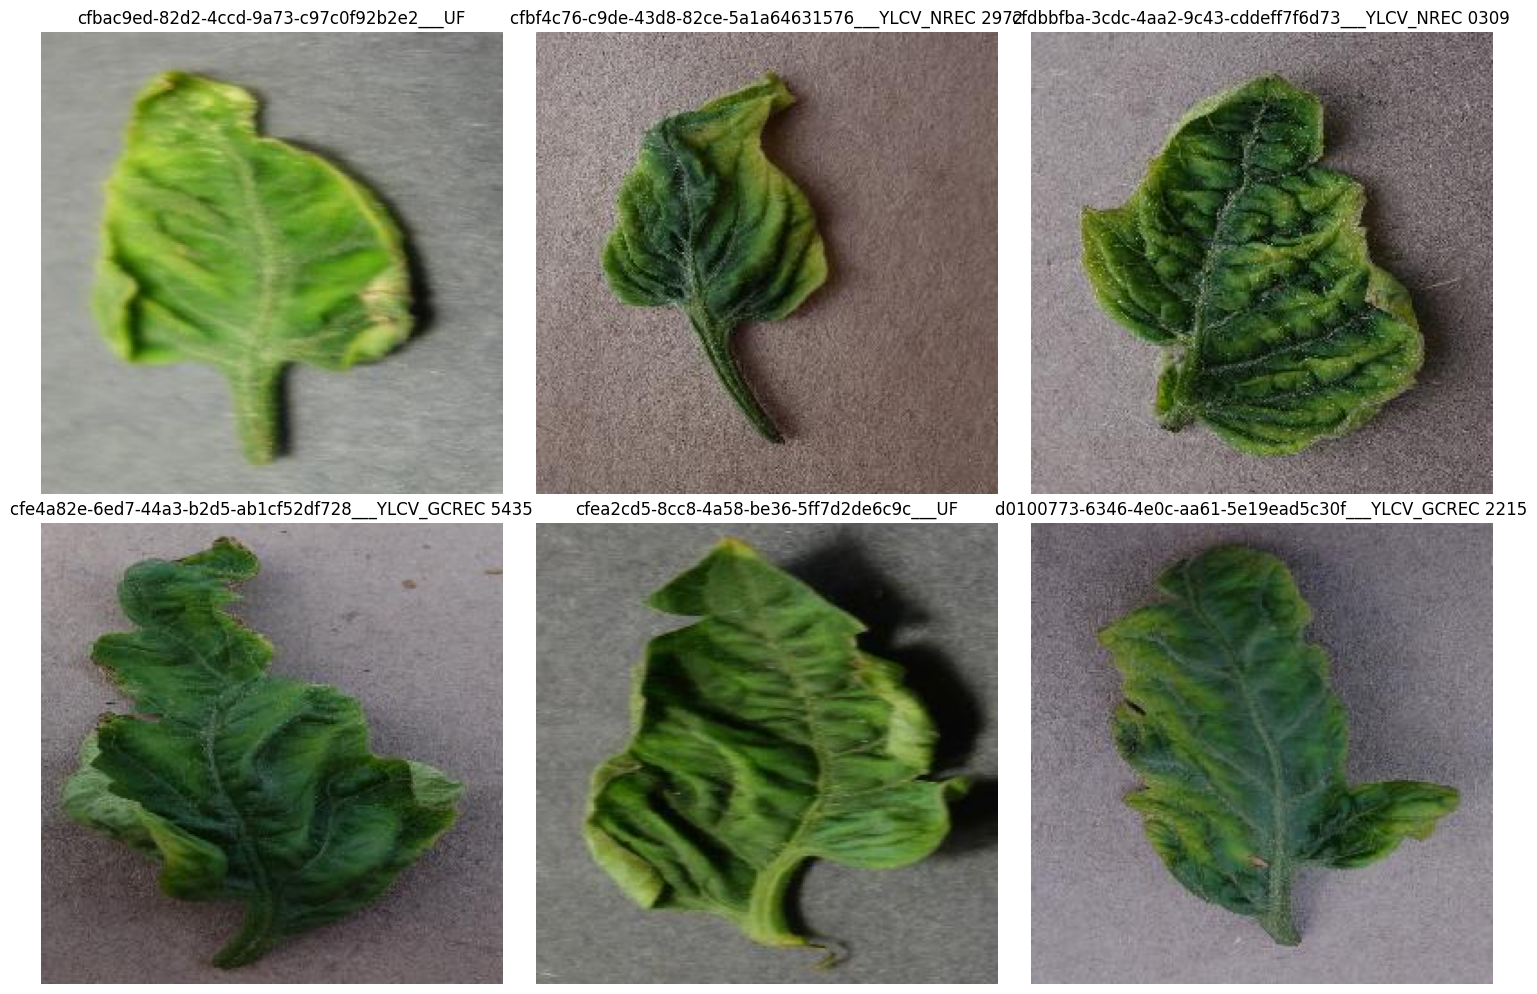

In [5]:
# Path to the directory containing images
path = "C:/Projekty/pr_magi_2024/archive/tomato/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus"

# Get a list of all image file names in the directory
image_files = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

# Display the first 6 images with their labels
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i in range(6):
    # Get the image file name and its label
    image_file = image_files[i]
    label = image_file.split('.')[0]

    # Load and display the image
    img_path = os.path.join(path, image_file)
    img = mpimg.imread(img_path)
    ax = axs[i // 3, i % 3]
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(label)

plt.tight_layout()
plt.show()

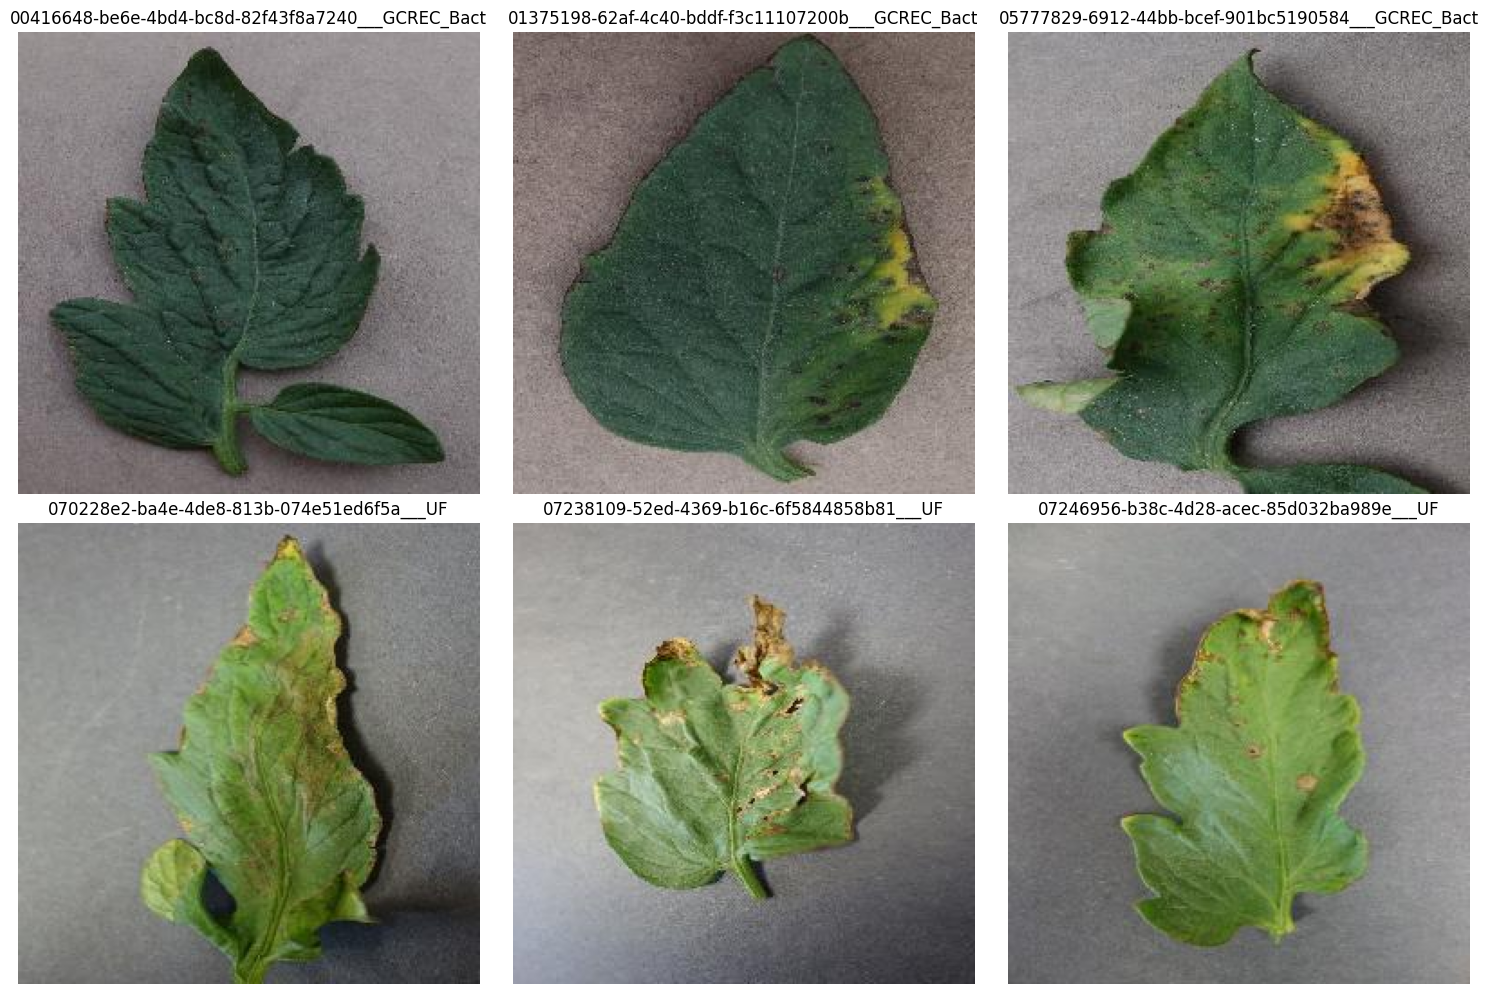

In [6]:
# Path to the directory containing images
path = "C:/Projekty/pr_magi_2024/archive/tomato/train/Tomato___Bacterial_spot"

# Get a list of all image file names in the directory
image_files = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

# Display the first 6 images with their labels
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for i in range(6):
    # Get the image file name and its label
    image_file = image_files[i]
    label = image_file.split('.')[0]

    # Load and display the image
    img_path = os.path.join(path, image_file)
    img = mpimg.imread(img_path)
    ax = axs[i // 3, i % 3]
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(label)

plt.tight_layout()
plt.show()


<div style="border-radius: 30px 0 30px 0px; border: 2px solid #00ea98; padding: 20px; background-color: #0a141b; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);">
    <h1 style="color: #7ab052; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px;">4 | Training The Model</h1>
</div>

**WORKING**
- The code initializes a `DenseNet121` model with weights pre-trained on the ImageNet dataset.
- The `include_top=False argument` specifies that the model should not include the fully connected layers at the top of the network, which are typically used for ImageNet classification.
- The `input_shape=(256,256,3) argument` specifies the shape of the input images that the model expects, which is `256x256` pixels with 3 channels (RGB).
- The initialized model `conv_base` can be used as a feature extractor to extract features from images, which can then be used as input to a custom classification head.

In [7]:
conv_base = DenseNet121(
    weights='imagenet',
    include_top = False,
    input_shape=(256,256,3),
    pooling='avg'
)

**WHY FALSE ?**
- Setting conv_base.trainable = False freezes the weights of the pre-trained DenseNet121 model.
- This is done to prevent the weights from being updated during the training of the custom classification head.
- Freezing the pre-trained weights helps in utilizing the learned features from the ImageNet dataset without altering them.
- It also reduces the computational cost and training time, as only the weights of the custom classification head will be trained.

In [8]:
conv_base.trainable = False

In [9]:
# # Summary of the pretrained model
# conv_base.summary()

**WORKING**

- It initializes a Sequential model and adds the `pre-trained` DenseNet121` model (conv_base) ` as the base.
- The model flattens the output from the base model and adds two fully connected layers with `ReLU activation`.
- `Batch normalization` is applied after each fully connected layer to improve training stability and speed.

In [10]:
model = Sequential()
model.add(conv_base)
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.35))
model.add(BatchNormalization())
model.add(Dense(120, activation='relu'))
model.add(Dense(10, activation='softmax'))

**WORKING**

- The compile method is used to configure the model for training.
- The optimizer=Adam(lr=0.0001) argument specifies the Adam optimizer with a learning rate of 0.0001.
- The loss='categorical_crossentropy' argument specifies the loss function used for training, which is categorical crossentropy for multi-class classification.
- The metrics=['accuracy'] argument specifies the metric used to evaluate the model, which is accuracy in this case.

In [11]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

**WORKING**
- The `fit` method is used to train the model on the training data (`train_data`) for a specified number of epochs (100 in this case).
- The `validation_data=val_data` argument specifies the validation data to evaluate the model performance after each epoch.
- The `callbacks=[EarlyStopping(patience=0)]` argument specifies the use of early stopping to prevent overfitting. The training will stop if the validation loss does not improve after 0 epochs.
- The `history` variable stores the training history, including metrics such as loss and accuracy, which can be used for analysis and visualization.

In [12]:
# history = model.fit(train_ds,epochs=10,validation_data=validation_ds)
import time

start = time.time()

history = model.fit(train_data, epochs=1, validation_data=val_data, callbacks=[EarlyStopping(patience=0)])

end = time.time()
print("Czas trenowannia modelu:" + str(end - start))

313/313 ━━━━━━━━━━━━━━━━━━━━ 441s 1s/step - accuracy: 0.3486 - loss: 1.9385 - val_accuracy: 0.7450 - val_loss: 0.9192
Czas trenowannia modelu:441.0674560070038


In [13]:
print("Czas trenowannia modelu: {:.3}h".format((end - start)/3600))

Czas trenowannia modelu: 0.123h


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)             │ (None, 1024)                │       7,037,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 120)                 │          30,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,210 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,931,096 (30.25 MB)

 Trainable params: 297,010 (1.13 MB)

 Non-trainable params: 7,040,064 (26.86 MB)

 Optimizer params: 594,022 (2.27 MB)

In [15]:
# Evaluate the model on the validation data
evaluation = model.evaluate(val_data)

# Print the evaluation metrics
print("Validation Loss:", evaluation[0])
print("Validation Accuracy:", evaluation[1])

32/32 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.7672 - loss: 0.8863
Validation Loss: 0.9191503524780273
Validation Accuracy: 0.7450000047683716


### Zapisanie modelu

In [16]:
model.save('C:/Projekty/pr_magi_2024/Modele/my_model.h5')

## Załaduj model

In [17]:
# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('C:/Projekty/pr_magi_2024/Modele/my_model.h5')

# Show the model architecture
new_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)             │ (None, 1024)                │       7,037,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 120)                 │          30,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,210 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,337,076 (27.99 MB)

 Trainable params: 297,010 (1.13 MB)

 Non-trainable params: 7,040,064 (26.86 MB)

 Optimizer params: 2 (12.00 B)

## Testowanie

In [39]:
from tkinter import *
from tkinter import filedialog

def get_file_path():
    global file_path

    file_path= filedialog.askopenfilename(title = "Select A File", filetypes = (("jpg", "*.jpg"), ("mp4", "*.mp4"), ("wmv", "*.wmv"), ("avi", "*.avi")))
    l1 = Label(window, text = "File path: " + file_path).pack()

window = Tk()

b1 = Button(window, text = "Open File", command = get_file_path).pack()
window.mainloop()
print(file_path)

C:/Projekty/pr_magi_2024/archive/tomato/val/Tomato___Bacterial_spot/0ab9c705-f29e-45ac-b786-9549b3c38f16___GCREC_Bact.Sp 3223.JPG


In [ ]:
#.reshape(-1, 256, 256, 1)

In [34]:
from keras.preprocessing.image import load_img
import numpy as np
file_path = "C:/Projekty/pr_magi_2024/archive/tomato/val/Tomato___Bacterial_spot/0ab9c705-f29e-45ac-b786-9549b3c38f16___GCREC_Bact.Sp 3223.JPG"
img = load_img(file_path, color_mode="grayscale", target_size=(256,256))

model.predict(tf.Tensor(np.array([img]))) 

TypeError: Tensor() takes no arguments